# 
 Contents 
1차원 분포 플롯
다차원 데이터
다차원 복합 데이터
catplot
기타
스타일
Seaborn을 사용한 데이터 분포 시각화

In [56]:
# import
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)
import seaborn as sns

In [4]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

#### 1차원 분포 슬롯

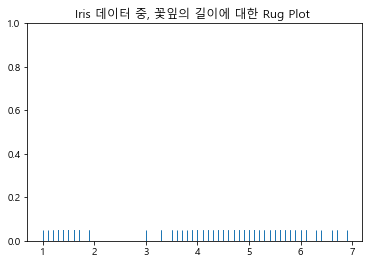

In [5]:
x = iris.petal_length.values

sns.rugplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Rug Plot ")
plt.show()

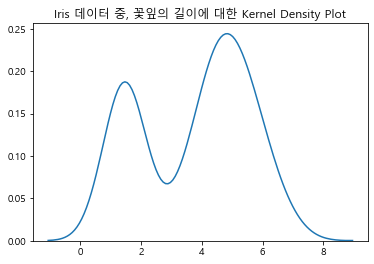

In [9]:
sns.kdeplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Kernel Density Plot")
plt.show()

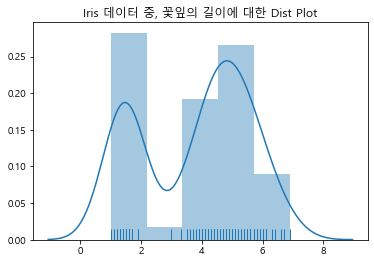

In [7]:
sns.distplot(x, kde=True, rug=True)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot")
plt.show()

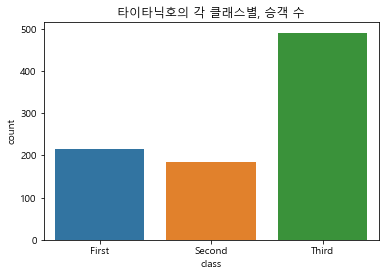

In [12]:
sns.countplot(x="class", data=titanic)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

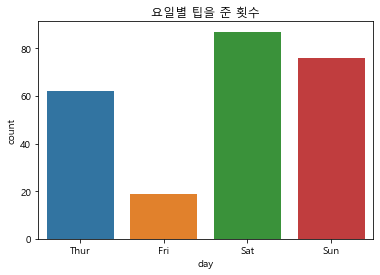

In [13]:
sns.countplot(x="day", data=tips)
plt.title("요일별 팁을 준 횟수")
plt.show()

In [18]:
tips.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


#### 다차원 데이터

##### 2차원 실수형 데이터

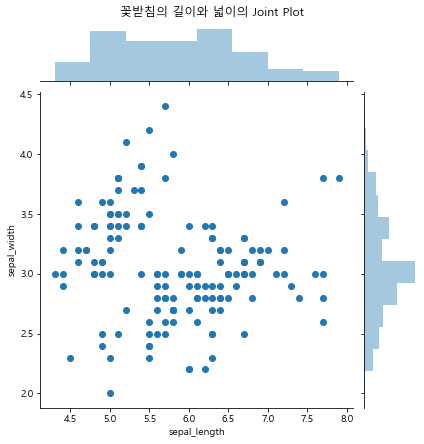

In [21]:
#jointplot(x="x_name", y="y_name", data=dataframe, kind='scatter')
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot", y=1.02)
plt.show()

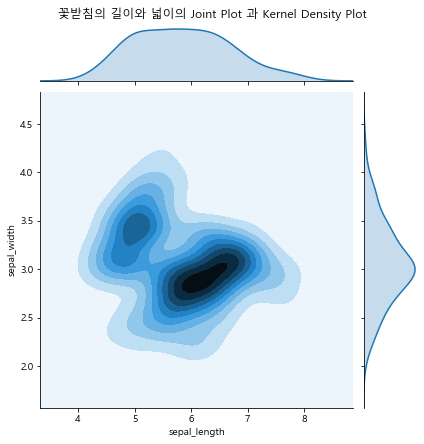

In [23]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde")
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot 과 Kernel Density Plot", y=1.02)
plt.show()

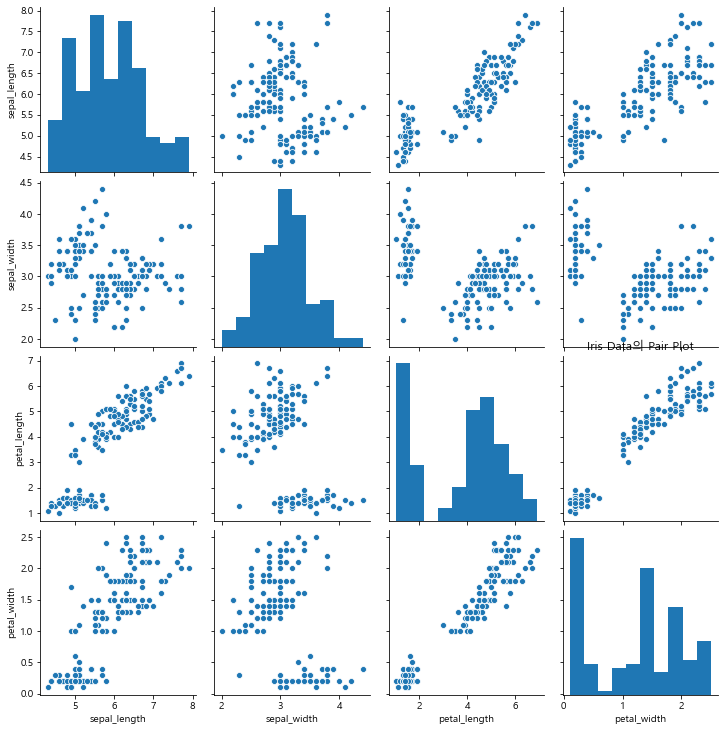

In [24]:
sns.pairplot(iris)
plt.title("Iris Data의 Pair Plot")
plt.show()

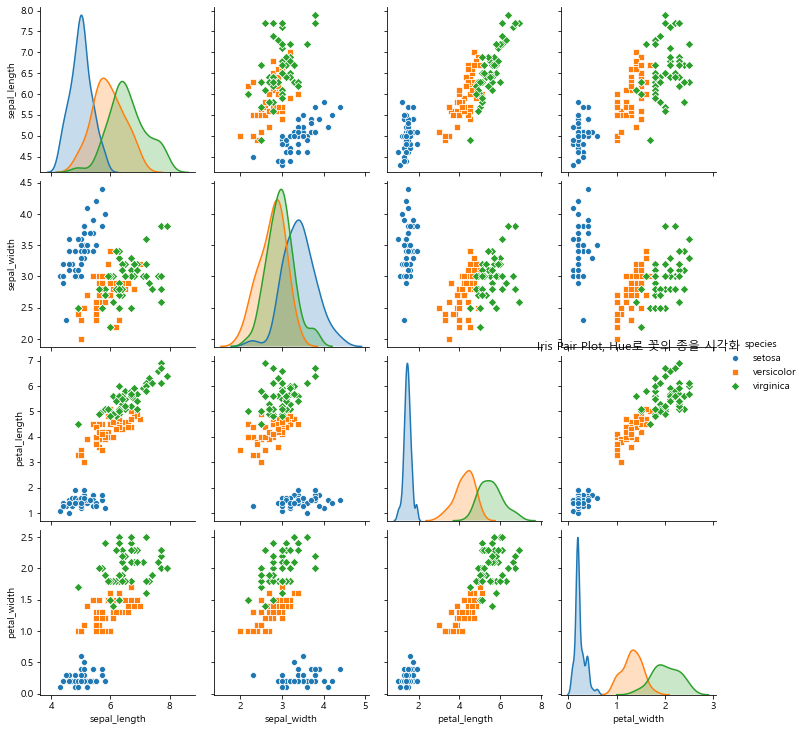

In [25]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
#hue 로 groupby 하듯이 나누고 순서대로 마커 지정
plt.title("Iris Pair Plot, Hue로 꽃의 종을 시각화")
plt.show()

### 2차원 카테고리 데이터

In [31]:
titanic_size = titanic.pivot_table(
    index="class", columns="sex", aggfunc="size")
titanic_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


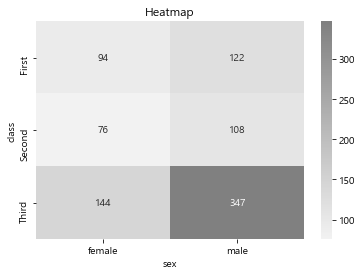

In [34]:
sns.heatmap(titanic_size, cmap=sns.light_palette(
    "gray", as_cmap=True), annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

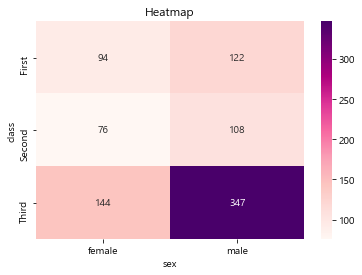

In [38]:
sns.heatmap(titanic_size, cmap='RdPu', annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

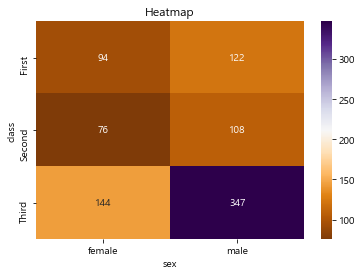

In [42]:
sns.heatmap(titanic_size, cmap='PuOr', annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

#### 2차원 복합 데이터

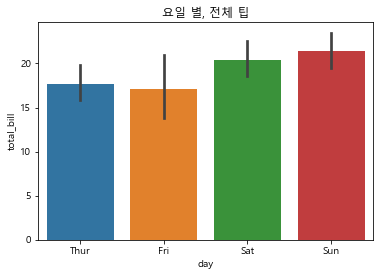

In [43]:
sns.barplot(x="day", y="total_bill", data=tips)
plt.title("요일 별, 전체 팁")
plt.show()

In [48]:
mpg = sns.load_dataset('mpg')
def get_mfger(full_name):
    return full_name.split()[0]
def get_model(full_name):
    return full_name.split()[1:]

mpg['manufacturer'] = mpg.name.apply(get_mfger)
mpg['model'] = mpg.name.apply(get_model)
del mpg['name']

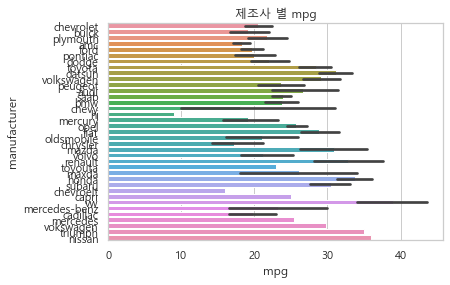

In [57]:
sns.barplot(y="manufacturer", x="mpg", data=mpg)
plt.title("제조사 별 mpg")
plt.show()

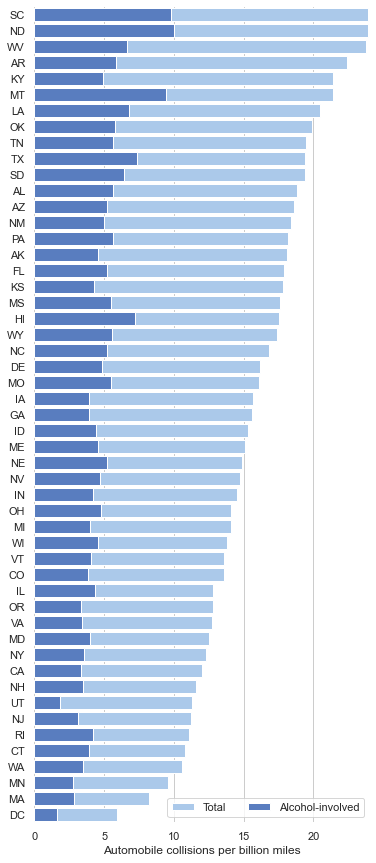

In [54]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

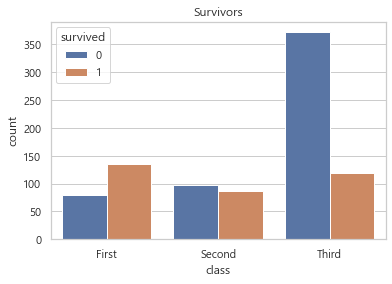

In [68]:
sns.countplot(x ='class', hue=('survived'), data = titanic)
plt.title('Survivors')
plt.show()

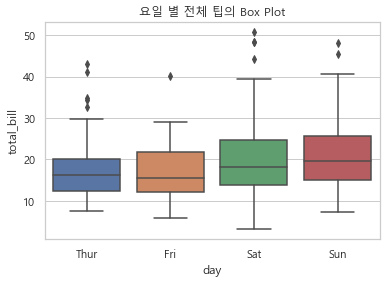

In [66]:
sns.boxplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Box Plot")
plt.show()

#### 다차원 복합데이터 

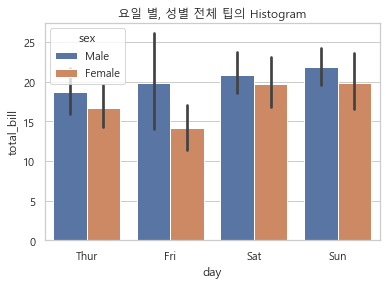

In [69]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Histogram")
plt.show()

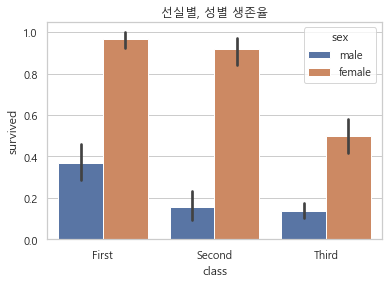

In [72]:
sns.barplot(x="class", y="survived", hue="sex", data=titanic)
plt.title("선실별, 성별 생존율")
plt.show()

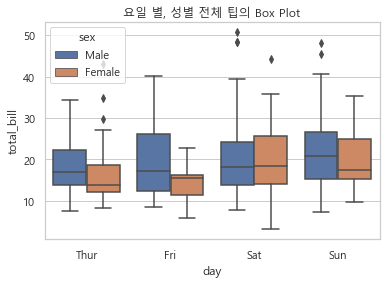

In [73]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Box Plot")
plt.show()


In [77]:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


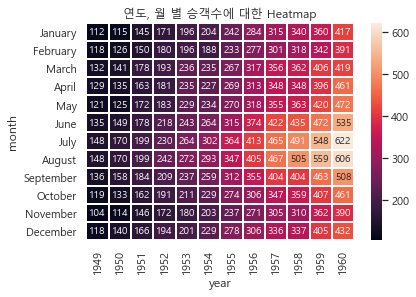

In [76]:
flights_passengers = flights.pivot("month", "year", "passengers")
plt.title("연도, 월 별 승객수에 대한 Heatmap")
sns.heatmap(flights_passengers, annot=True, fmt="d", linewidths=1)
plt.show()

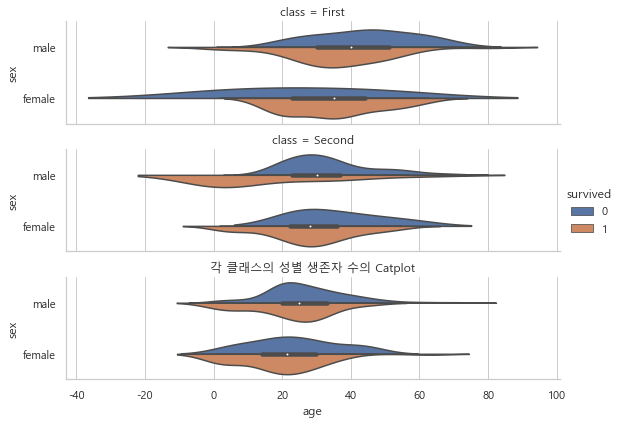

In [78]:
data = titanic[titanic.survived.notnull()]
sns.catplot(x="age", y="sex", hue="survived", row="class", data=data,
            kind="violin", split=True, height=2, aspect=4)
plt.title("각 클래스의 성별 생존자 수의 Catplot")
plt.show()